In [5]:
import pandas as pd
from math import sqrt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('./Data/train_titanic.csv', sep=',')
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
data['FareBin'] = pd.qcut(data['Fare'], 4)
data['AgeBin'] = pd.cut(data['Age'].astype(int), 6)
data.head(5)


Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   
2         1       3  female  26.0      0      0   7.9250        S   
3         1       1  female  35.0      1      0  53.1000        S   
4         0       3    male  35.0      0      0   8.0500        S   

           FareBin            AgeBin  
0   (-0.001, 7.91]  (13.333, 26.667]  
1  (31.0, 512.329]    (26.667, 40.0]  
2   (7.91, 14.454]  (13.333, 26.667]  
3  (31.0, 512.329]    (26.667, 40.0]  
4   (7.91, 14.454]    (26.667, 40.0]

In [10]:
label = LabelEncoder()
data['Labeled_AgeBin'] = label.fit_transform(data['AgeBin'])
data['Labeled_FareBin'] = label.fit_transform(data['FareBin'])
data['FamilySize'] = data['Parch']+ data['SibSp']+1
data['IsAlone'] = 1
data['IsAlone'].loc[data['FamilySize'] > 1] = 0
data.head(5)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   
2         1       3  female  26.0      0      0   7.9250        S   
3         1       1  female  35.0      1      0  53.1000        S   
4         0       3    male  35.0      0      0   8.0500        S   

           FareBin            AgeBin  Labeled_AgeBin  Labeled_FareBin  \
0   (-0.001, 7.91]  (13.333, 26.667]               1                0   
1  (31.0, 512.329]    (26.667, 40.0]               2                3   
2   (7.91, 14.454]  (13.333, 26.667]               1                1   
3  (31.0, 512.329]    (26.667, 40.0]               2                3   
4   (7.91, 14.454]    (26.667, 40.0]               2                1   

   FamilySize  IsAlone  
0           2        0  
1           2        0  
2           1        1  
3           2        0  
4           1        1

**Matrice de corrélation**
permet de voir quelle variable est liée à qui

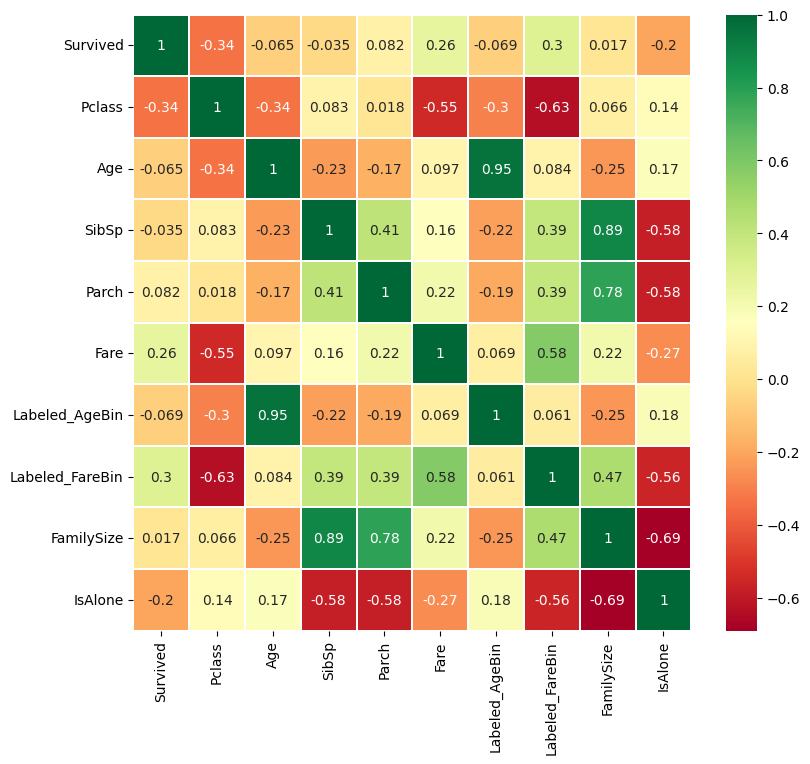

In [11]:
sb.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
y = data['Survived']
data= data[['Pclass', 'Sex', 'Embarked', 'Labeled_AgeBin', 'Labeled_FareBin' , 'FamilySize', 'IsAlone']]

In [18]:
data = pd.get_dummies(data)
data

Pclass  Labeled_AgeBin  Labeled_FareBin  FamilySize  IsAlone  Sex_female  \
0         3               1                0           2        0           0   
1         1               2                3           2        0           1   
2         3               1                1           1        1           1   
3         1               2                3           2        0           1   
4         3               2                1           1        1           0   
..      ...             ...              ...         ...      ...         ...   
886       2               2                1           1        1           0   
887       1               1                2           1        1           1   
888       3               2                2           4        0           1   
889       1               1                2           1        1           0   
890       3               2                0           1        1           0   

     Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0           1           0           0           1  
1           0           1           0           0  
2           0           0           0           1  
3           0           0           0           1  
4           1           0           0           1  
..        ...         ...         ...         ...  
886         1           0           0           1  
887         0           0           0           1  
888         0           0           0           1  
889         1           1           0           0  
890         1           0           1           0  

[891 rows x 10 columns]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.25)
log_regression_alg = LogisticRegression()
log_regression_alg.fit(x_train, y_train)
test_predictions = log_regression_alg.predict(x_test)
precision, recall, _, _ = score(y_test, test_predictions, pos_label=1, average='binary')
accuracy = round((test_predictions==y_test).sum() / len(test_predictions),3)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), accuracy))

Precision: 0.713 / Recall: 0.77 / Accuracy: 0.789


In [21]:
prob_test_predictions =  log_regression_alg.predict_proba(x_test)
prob_test_predictions


array([[0.86286254, 0.13713746],
       [0.47774494, 0.52225506],
       [0.27626635, 0.72373365],
       [0.61587937, 0.38412063],
       [0.78997893, 0.21002107],
       [0.32925272, 0.67074728],
       [0.48316045, 0.51683955],
       [0.29175313, 0.70824687],
       [0.89590191, 0.10409809],
       [0.87473637, 0.12526363],
       [0.88167485, 0.11832515],
       [0.78007714, 0.21992286],
       [0.56115283, 0.43884717],
       [0.07127364, 0.92872636],
       [0.08726531, 0.91273469],
       [0.89590191, 0.10409809],
       [0.17230776, 0.82769224],
       [0.04282904, 0.95717096],
       [0.1804449 , 0.8195551 ],
       [0.04282904, 0.95717096],
       [0.71552284, 0.28447716],
       [0.17767265, 0.82232735],
       [0.90800684, 0.09199316],
       [0.89590191, 0.10409809],
       [0.46093086, 0.53906914],
       [0.68682561, 0.31317439],
       [0.14087831, 0.85912169],
       [0.85224245, 0.14775755],
       [0.86035486, 0.13964514],
       [0.46093086, 0.53906914],
       [0.

In [22]:
prob_test_predictions =  log_regression_alg.predict_proba(x_test)[:,1]
bin_class_1 = (prob_test_predictions >=0.5).astype(int)

In [23]:
compare = (bin_class_1 == test_predictions).all()
compare

True

In [24]:
bin_class_2 = (prob_test_predictions >=0.3).astype(int)
precision, recall, _, _ = score(y_test, bin_class_2, pos_label=1, average='binary')
accuracy = round((bin_class_2==y_test).sum() / len(bin_class_2),3)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), accuracy))

Precision: 0.655 / Recall: 0.851 / Accuracy: 0.767
